In [20]:
import tweepy
import datetime

In [16]:
consumer_key = "mPvEuZkAkq4bCv16N8U2kBS8B"
consumer_secret = "zfPqeVOivbNClHXW1sQ1eetK55kVBd4o4mOAWPDS6kfdtyzxmO"
access_token = "1251920853878611970-Z0Jj9QGk3SGiXlGcz14W7H3XWbnrRH"
access_token_secret = "OFVn729thIsPP48GETOBEaZR5VyMr9mJRu9A0FJ3a8wxe"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

In [40]:
import pandas as pd
twitter_frame = pd.read_csv("covid_congress.csv")
twitter_frame = twitter_frame.loc[:, twitter_frame.columns.intersection(["Twitter Handle","party", "lastName", "firstName", "state"])]
twitter_frame = twitter_frame.set_index("party")
twitter_frame

,state,Twitter Handle,lastName,firstName
party,,,,
Republican,LA,@RepAbraham,Abraham,Ralph
Democrat,NC,@RepAdams,Adams,Alma
Republican,AL,@Robert_Aderholt,Aderholt,Robert
Democrat,CA,@RepPeteAguilar,Aguilar,Pete
Republican,TN,@SenAlexander,Alexander,Lamar
...,...,...,...,...
Democrat,KY,@RepJohnYarmuth,Yarmuth,John
Republican,FL,@RepTedYoho,Yoho,Ted
Republican,AK,@repdonyoung,Young,Don


In [109]:
gop_frame = twitter_frame.drop(labels = "Democrat", axis = 0)
gop_frame

,state,Twitter Handle,lastName,firstName
party,,,,
Republican,LA,@RepAbraham,Abraham,Ralph
Republican,AL,@Robert_Aderholt,Aderholt,Robert
Republican,TN,@SenAlexander,Alexander,Lamar
Republican,GA,@RepRickAllen,Allen,Rick
Republican,MI,@justinamash,Amash,Justin
Republican,AS,@RepAmata,Amata,Aumua
Republican,NV,@MarkAmodeiNV2,Amodei,Mark
Republican,ND,@RepArmstrongND,Armstrong,Kelly
Republican,TX,@RepArrington,Arrington,Jodey


In [444]:
gop_handle_list = []

for handle in gop_frame["Twitter Handle"]:
    gop_handle_list.append(handle)
    
len(gop_handle_list)

251

In [249]:
# scrape tweets for an individual legislator during the relevant time period
tweets = []
username = handle
start_date = datetime.datetime(2020, 4, 1, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 30, 0, 0, 0)

for tweet in api.user_timeline(id = "@Robert_Aderholt", include_rts = True, count = 100):
    if tweet.created_at <= end_date and tweet.created_at >= start_date:
        tweets.append(tweet.text)

len(tweets)

37

### Tweets from 2020-04-19 to 2020-04-25 (Week 4):

In [250]:
week4_dict = {}
start_date = datetime.datetime(2020, 4, 19, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 25, 0, 0, 0)

for handle in gop_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >= 0 or tweet.find("Beijing") >= 0 or tweet.find("Wuhan") >= 0:
                tweets.append(tweet)
    week4_dict[handle] = tweets
    
week4_dict

{'@RepAbraham': [],
 '@Robert_Aderholt': [],
 '@SenAlexander': [],
 '@RepRickAllen': [],
 '@justinamash': [],
 '@RepAmata': [],
 '@MarkAmodeiNV2': [],
 '@RepArmstrongND': ['RT @RepKinzinger: When the Chinese gov’t tells me they “implemented control measures,” does that include the control of information; shutti…'],
 '@RepArrington': [],
 '@RepBrianBabin': ['China’s Communist Regime violated the 2005 Int’l Health Regs when they deliberately lied to the world about… https://t.co/zKoMckqvpS'],
 '@RepDonBacon': ['@Plant_doc Not buying it. The CDC, NIH, among others saw funding increases. China denied problem for month and half… https://t.co/SrLw929KrF',
  '@Kay_wise It taught honesty... and transparency. Three journalists at Wuhan are still missing who reported truth... that should concern all.',
  '@ArynHuck Americans deserve to know truth on Chinese Govt suppressing the truth.',
  "Instead of warning the world, China's Communist Govt lied while censoring doctors &amp; journalists delayin

In [254]:
type(week4_dict[handle])

list

In [255]:
# count the number of tweets for each legislator that mention China (or other key words) in the relevant timeframe

week4_chinatweets_dict = {}
count = 0

for handle in gop_handle_list:
    for tweet in week4_dict[handle]:
        week4_chinatweets_dict[handle] = len(week4_dict[handle])
    count += len(week4_dict[handle])
    
week4_chinatweets_dict

{'@RepArmstrongND': 1,
 '@RepBrianBabin': 1,
 '@RepDonBacon': 4,
 '@RepJimBanks': 9,
 '@RepAndyBarr': 1,
 '@MarshaBlackburn': 16,
 '@SenatorBraun': 3,
 '@VernBuchanan': 2,
 '@RepKenBuck': 1,
 '@RepTedBudd': 4,
 '@RepTimBurchett': 1,
 '@KenCalvert': 1,
 '@RepLizCheney': 1,
 '@RepCloudTX': 1,
 '@RepDougCollins': 2,
 '@SenTomCotton': 10,
 '@RepDanCrenshaw': 3,
 '@SenTedCruz': 5,
 '@SenJoniErnst': 3,
 '@RepChuck': 1,
 '@RepBillFlores': 1,
 '@RepMattGaetz': 6,
 '@SenCoryGardner': 1,
 '@LindseyGrahamSC': 1,
 '@RepMarkGreen': 8,
 '@SenHawleyPress': 4,
 '@RepRichHudson': 1,
 '@HurdOnTheHill': 5,
 '@RepMikeJohnson': 4,
 '@RepJohnJoyce': 1,
 '@SenJohnKennedy': 1,
 '@RepKinzinger': 2,
 '@RepLaHood': 1,
 '@SenatorLankford': 1,
 '@USRepLong': 2,
 '@RepBrianMast': 1,
 '@RepMcCaul': 4,
 '@SenMcSallyAZ': 1,
 '@RepAlexMooney': 1,
 '@RepPeteOlson': 1,
 '@CongPalazzo': 2,
 '@RandPaul': 1,
 '@RepScottPerry': 1,
 '@GReschenthaler': 2,
 '@RepRiggleman': 4,
 '@RepMikeRogersAL': 2,
 '@SenatorRomney': 2,
 '@Se

In [256]:
count

150

In [257]:
week_4 = pd.DataFrame.from_dict(week4_chinatweets_dict, orient = "index")
week_4 = week_4.reset_index()
week_4 = week_4.rename(columns = {"index":"Twitter Handle"})
week_4

,Twitter Handle,0
0,@RepArmstrongND,1
1,@RepBrianBabin,1
2,@RepDonBacon,4
3,@RepJimBanks,9
4,@RepAndyBarr,1
5,@MarshaBlackburn,16
6,@SenatorBraun,3
7,@VernBuchanan,2
8,@RepKenBuck,1
9,@RepTedBudd,4


In [258]:
count_frame4 = gop_frame.copy()
count_frame4 = gop_frame.merge(week_4, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
count_frame4.columns = ["State", "Twitter Handle", "Last Name", "First Name", "Week 4 Count"]
count_frame4

,State,Twitter Handle,Last Name,First Name,Week 4 Count
0,ND,@RepArmstrongND,Armstrong,Kelly,1
1,TX,@RepBrianBabin,Babin,Brian,1
2,NE,@RepDonBacon,Bacon,Don,4
3,IN,@RepJimBanks,Banks,Jim,9
4,KY,@RepAndyBarr,Barr,Garland,1
5,TN,@MarshaBlackburn,Blackburn,Marsha,16
6,IN,@SenatorBraun,Braun,Mike,3
7,FL,@VernBuchanan,Buchanan,Vern,2
8,CO,@RepKenBuck,Buck,Ken,1
9,NC,@RepTedBudd,Budd,Ted,4


In [284]:
# number of tweets per state about China during the relevant time period
by_state4 = count_frame4.groupby("State").sum()
by_state4

,Week 4 Count
State,
AL,2
AR,10
AZ,1
CA,1
CO,4
FL,21
GA,2
IA,3
IL,3


### Tweets from 2020-04-12 to 2020-04-28 (Week 3):

In [251]:
week3_dict = {}
start_date = datetime.datetime(2020, 4, 12, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 18, 0, 0, 0)

for handle in gop_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >=0 or tweet.find("Beijing") >=0 or tweet.find("Wuhan") >=0:
                tweets.append(tweet)
    week3_dict[handle] = tweets
    
week3_dict

{'@RepAbraham': [],
 '@Robert_Aderholt': ['The Chinese Communist Party has been working for years to become a global pharmacy. And after blatantly lying and w… https://t.co/5uyqxSQpVN',
  'RT @GOPLeader: Imagine what the world would look like if Communist China had not tried to cover up the coronavirus. It could have been cont…'],
 '@SenAlexander': [],
 '@RepRickAllen': [],
 '@justinamash': [],
 '@RepAmata': [],
 '@MarkAmodeiNV2': [],
 '@RepArmstrongND': [],
 '@RepArrington': ['RT @GOPoversight: The Chinese Communist Party has to be held accountable. https://t.co/5nCGcfM4vx',
  'I agree with my colleague in the Senate, @LindseyGrahamSC. \n\nChina must be held accountable for the deaths &amp; infect… https://t.co/PmbUY8GBSj'],
 '@RepBrianBabin': [],
 '@RepDonBacon': [],
 '@RepJimBaird': [],
 '@RepBalderson': [],
 '@RepJimBanks': ['#FlashbackFriday to when the New York Times, despite having its journalists thrown out of Beijing in Q1, decided to… https://t.co/C2T1a04PgO',
  'Overnight, C

In [260]:
week3_chinatweets_dict = {}
count = 0

for handle in gop_handle_list:
    for tweet in week3_dict[handle]:
        week3_chinatweets_dict[handle] = len(week3_dict[handle])
    count += len(week3_dict[handle])
    
week3_chinatweets_dict

{'@Robert_Aderholt': 2,
 '@RepArrington': 2,
 '@RepJimBanks': 4,
 '@RepJackBergman': 1,
 '@RepKevinBrady': 1,
 '@RepKenBuck': 2,
 '@RepTedBudd': 4,
 '@michaelcburgess': 1,
 '@RepBuddyCarter': 1,
 '@RepSteveChabot': 2,
 '@RepLizCheney': 1,
 '@RepDougCollins': 4,
 '@SenTomCotton': 9,
 '@RepRickCrawford': 2,
 '@RepDanCrenshaw': 1,
 '@SteveDaines': 3,
 '@DesJarlaisTN04': 2,
 '@RepJeffDuncan': 1,
 '@DrNealDunnFL2': 1,
 '@RepChuck': 3,
 '@RepRussFulcher': 1,
 '@RepMattGaetz': 5,
 '@RepGallagher': 1,
 '@SenCoryGardner': 1,
 '@replouiegohmert': 1,
 '@LindseyGrahamSC': 5,
 '@RepMarkGreen': 10,
 '@RepGrothman': 1,
 '@RepHartzler': 1,
 '@SenHawleyPress': 4,
 '@CongressmanHice': 3,
 '@RepFrenchHill': 1,
 '@RepTrey': 1,
 '@HurdOnTheHill': 1,
 '@RepMikeJohnson': 1,
 '@RepBillJohnson': 1,
 '@Jim_Jordan': 1,
 '@SenJohnKennedy': 1,
 '@RepPeteKing': 1,
 '@RepKinzinger': 2,
 '@RepLaMalfa': 2,
 '@RepDLesko': 1,
 '@RepMcCaul': 3,
 '@cathymcmorris': 3,
 '@SenMcSallyAZ': 1,
 '@GReschenthaler': 3,
 '@RepRiggl

In [261]:
count

125

In [262]:
week_3 = pd.DataFrame.from_dict(week3_chinatweets_dict, orient = "index")
week_3 = week_3.reset_index()
week_3 = week_3.rename(columns = {"index":"Twitter Handle"})
week_3

,Twitter Handle,0
0,@Robert_Aderholt,2
1,@RepArrington,2
2,@RepJimBanks,4
3,@RepJackBergman,1
4,@RepKevinBrady,1
5,@RepKenBuck,2
6,@RepTedBudd,4
7,@michaelcburgess,1
8,@RepBuddyCarter,1
9,@RepSteveChabot,2


In [263]:
count_frame3 = gop_frame.copy()
count_frame3 = gop_frame.merge(week_3, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
count_frame3.columns = ["State", "Twitter Handle", "Last Name", "First Name", "Week 3 Count"]
count_frame3

,State,Twitter Handle,Last Name,First Name,Week 3 Count
0,AL,@Robert_Aderholt,Aderholt,Robert,2
1,TX,@RepArrington,Arrington,Jodey,2
2,IN,@RepJimBanks,Banks,Jim,4
3,MI,@RepJackBergman,Bergman,Jack,1
4,TX,@RepKevinBrady,Brady,Kevin,1
5,CO,@RepKenBuck,Buck,Ken,2
6,NC,@RepTedBudd,Budd,Ted,4
7,TX,@michaelcburgess,Burgess,Michael,1
8,GA,@RepBuddyCarter,Carter,Buddy,1
9,OH,@RepSteveChabot,Chabot,Steve,2


In [285]:
# number of tweets per state about China during the relevant time period
by_state3 = count_frame3.groupby("State").sum()
by_state3

,Week 3 Count
State,
AL,2
AR,12
AZ,2
CA,2
CO,4
FL,9
GA,8
ID,1
IL,2


### Tweets from 2020-04-05 to 2020-04-11 (Week 2):

In [252]:
week2_dict = {}
start_date = datetime.datetime(2020, 4, 5, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 11, 0, 0, 0)

for handle in gop_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >=0 or tweet.find("Beijing") >=0 or tweet.find("Wuhan") >=0:
                tweets.append(tweet)
    week2_dict[handle] = tweets
    
week2_dict

{'@RepAbraham': [],
 '@Robert_Aderholt': [],
 '@SenAlexander': [],
 '@RepRickAllen': [],
 '@justinamash': [],
 '@RepAmata': [],
 '@MarkAmodeiNV2': [],
 '@RepArmstrongND': [],
 '@RepArrington': ['RT @GOPoversight: 🚨NEW: Oversight Rs press WHO for info on its role in China\'s coronavirus propaganda campaign:\n\n"“Throughout the crisis, t…',
  'Right now, our focus has to be response &amp; relief, but as we recover, we must hold China &amp; the complicit @WHO accoun… https://t.co/tXTP6Vh5jC'],
 '@RepBrianBabin': ['RT @Jim_Jordan: If the #WHO wants to spread Chinese propaganda about #coronavirus, then the United States shouldn’t fund the WHO with our t…',
  'The loss of life is always tragic – no matter the # – but America and its people will endure.\n\nChina’s lied about n… https://t.co/fFcRRzZj56'],
 '@RepDonBacon': [],
 '@RepJimBaird': [],
 '@RepBalderson': [],
 '@RepJimBanks': [],
 '@RepAndyBarr': ['Yesterday I joined the Leland Conway Show to discuss COVID-19 and how China must be hel

In [265]:
week2_chinatweets_dict = {}
count = 0

for handle in gop_handle_list:
    for tweet in week2_dict[handle]:
        week2_chinatweets_dict[handle] = len(week2_dict[handle])
    count += len(week2_dict[handle])
    
week2_chinatweets_dict

{'@RepArrington': 2,
 '@RepBrianBabin': 2,
 '@RepAndyBarr': 1,
 '@RepTedBudd': 1,
 '@RepDougCollins': 2,
 '@SenTomCotton': 10,
 '@RepDanCrenshaw': 1,
 '@SteveDaines': 4,
 '@DesJarlaisTN04': 1,
 '@RepChuck': 1,
 '@RepBillFlores': 4,
 '@JeffFortenberry': 1,
 '@RepGallagher': 1,
 '@LindseyGrahamSC': 3,
 '@RepAndyHarrisMD': 1,
 '@repkevinhern': 1,
 '@CongressmanHice': 4,
 '@HurdOnTheHill': 1,
 '@RepBillJohnson': 1,
 '@Jim_Jordan': 3,
 '@RepDLamborn': 1,
 '@RepMcCaul': 1,
 '@cathymcmorris': 2,
 '@RepRalphNorman': 2,
 '@USRepGaryPalmer': 1,
 '@GReschenthaler': 5,
 '@SenPatRoberts': 1,
 '@SenatorRomney': 1,
 '@RepChipRoy': 3,
 '@RepChrisSmith': 1,
 '@RepMarkWalker': 1,
 '@TXRandy14': 1,
 '@RepRonWright': 1,
 '@RepTedYoho': 2}

In [266]:
count

68

In [267]:
week_2 = pd.DataFrame.from_dict(week2_chinatweets_dict, orient = "index")
week_2 = week_2.reset_index()
week_2 = week_2.rename(columns = {"index":"Twitter Handle"})
week_2

,Twitter Handle,0
0,@RepArrington,2
1,@RepBrianBabin,2
2,@RepAndyBarr,1
3,@RepTedBudd,1
4,@RepDougCollins,2
5,@SenTomCotton,10
6,@RepDanCrenshaw,1
7,@SteveDaines,4
8,@DesJarlaisTN04,1
9,@RepChuck,1


In [268]:
count_frame2 = gop_frame.copy()
count_frame2 = gop_frame.merge(week_2, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
count_frame2.columns = ["State", "Twitter Handle", "Last Name", "First Name", "Week 2 Count"]
count_frame2

,State,Twitter Handle,Last Name,First Name,Week 2 Count
0,TX,@RepArrington,Arrington,Jodey,2
1,TX,@RepBrianBabin,Babin,Brian,2
2,KY,@RepAndyBarr,Barr,Garland,1
3,NC,@RepTedBudd,Budd,Ted,1
4,GA,@RepDougCollins,Collins,Doug,2
5,AR,@SenTomCotton,Cotton,Tom,10
6,TX,@RepDanCrenshaw,Crenshaw,Dan,1
7,MT,@SteveDaines,Daines,Steve,4
8,TN,@DesJarlaisTN04,DesJarlais,Scott,1
9,TN,@RepChuck,Fleischmann,Charles,1


In [281]:
# number of tweets per state about China during the relevant time period
by_state2 = count_frame2.groupby("State").sum()
by_state2

,Week 2 Count
State,
AL,1
AR,10
CO,1
FL,2
GA,3
KS,1
KY,1
MD,1
MT,4


### Tweets from 2020-03-29 to 2020-04-04 (Week 1):

In [253]:
week1_dict = {}
start_date = datetime.datetime(2020, 3, 29, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 4, 0, 0, 0)

for handle in gop_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >=0 or tweet.find("Beijing") >=0 or tweet.find("Wuhan") >=0:
                tweets.append(tweet)
    week1_dict[handle] = tweets
    
week1_dict

{'@RepAbraham': [],
 '@Robert_Aderholt': [],
 '@SenAlexander': [],
 '@RepRickAllen': [],
 '@justinamash': [],
 '@RepAmata': [],
 '@MarkAmodeiNV2': [],
 '@RepArmstrongND': [],
 '@RepArrington': ['RT @RepJimBanks: Given the intelligence community‘s report today condemning the Chinese government’s handling of coronavirus, it makes sens…'],
 '@RepBrianBabin': [],
 '@RepDonBacon': [],
 '@RepJimBaird': [],
 '@RepBalderson': [],
 '@RepJimBanks': [],
 '@RepAndyBarr': [],
 '@SenJohnBarrasso': [],
 '@RepJackBergman': [],
 '@RepAndyBiggsAZ': [],
 '@RepGusBilirakis': [],
 '@RepRobBishop': [],
 '@MarshaBlackburn': [],
 '@RoyBlunt': [],
 '@JohnBoozman': [],
 '@RepBost': [],
 '@RepKevinBrady': [],
 '@SenatorBraun': [],
 '@RepMoBrooks': [],
 '@SusanWBrooks': [],
 '@VernBuchanan': [],
 '@RepKenBuck': ['The Chinese government has covered up its involvement in the coronavirus crisis since the beginning.\n\nIt is absolut… https://t.co/3osMlQAGNs',
  'The United States and the rest of the world need to rec

In [270]:
week1_chinatweets_dict = {}
count = 0

for handle in gop_handle_list:
    for tweet in week1_dict[handle]:
        week1_chinatweets_dict[handle] = len(week1_dict[handle])
    count += len(week1_dict[handle])
    
week1_chinatweets_dict

{'@RepArrington': 1,
 '@RepKenBuck': 3,
 '@RepTedBudd': 3,
 '@RepBuddyCarter': 1,
 '@RepCloudTX': 1,
 '@SenTomCotton': 9,
 '@RepDanCrenshaw': 1,
 '@DesJarlaisTN04': 6,
 '@RepBobGibbs': 1,
 '@RepHartzler': 2,
 '@CongressmanHice': 1,
 '@HurdOnTheHill': 4,
 '@RepTrentKelly': 1,
 '@SenJohnKennedy': 1,
 '@RepKinzinger': 4,
 '@RepDLamborn': 2,
 '@cathymcmorris': 1,
 '@RepCarolMiller': 2,
 '@RepRalphNorman': 1,
 '@RepTomRice': 1,
 '@RepGregSteube': 3,
 '@RepChrisStewart': 1,
 '@SenJohnThune': 1,
 '@reptimmons': 1,
 '@RepTipton': 2,
 '@RepTedYoho': 5,
 '@RepLeeZeldin': 1}

In [271]:
count

60

In [272]:
week_1 = pd.DataFrame.from_dict(week1_chinatweets_dict, orient = "index")
week_1 = week_1.reset_index()
week_1 = week_1.rename(columns = {"index":"Twitter Handle"})
week_1

,Twitter Handle,0
0,@RepArrington,1
1,@RepKenBuck,3
2,@RepTedBudd,3
3,@RepBuddyCarter,1
4,@RepCloudTX,1
5,@SenTomCotton,9
6,@RepDanCrenshaw,1
7,@DesJarlaisTN04,6
8,@RepBobGibbs,1
9,@RepHartzler,2


In [273]:
count_frame1 = gop_frame.copy()
count_frame1 = gop_frame.merge(week_1, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
count_frame1.columns = ["State", "Twitter Handle", "Last Name", "First Name", "Week 1 Count"]
count_frame1

,State,Twitter Handle,Last Name,First Name,Week 1 Count
0,TX,@RepArrington,Arrington,Jodey,1
1,CO,@RepKenBuck,Buck,Ken,3
2,NC,@RepTedBudd,Budd,Ted,3
3,GA,@RepBuddyCarter,Carter,Buddy,1
4,TX,@RepCloudTX,Cloud,Michael,1
5,AR,@SenTomCotton,Cotton,Tom,9
6,TX,@RepDanCrenshaw,Crenshaw,Dan,1
7,TN,@DesJarlaisTN04,DesJarlais,Scott,6
8,OH,@RepBobGibbs,Gibbs,Bob,1
9,MO,@RepHartzler,Hartzler,Vicky,2


In [282]:
by_state1 = count_frame1.groupby("State").sum()
by_state1

,Week 1 Count
State,
AR,9
CO,2
FL,4
GA,1
IL,4
LA,1
MO,2
MS,1
NC,3


In [319]:
merged_frame = pd.merge(by_state4, by_state3, how = "outer", on = ["State"])
merged_frame_new = pd.merge(merged_frame, by_state2, how = "outer", on = ["State"])
merged_frame_final = pd.merge(merged_frame_new, by_state1, how = "outer", on = ["State"])

merged_frame_final = merged_frame_final.sort_values(by = ["State"], axis = 0)
merged_frame_final.reset_index()

,State,Week 4 Count,Week 3 Count,Week 2 Count,Week 1 Count
0,AL,2,2,1,nan
1,AR,10,12,10,9
2,AZ,1,2,nan,nan
3,CA,1,2,nan,nan
4,CO,4,4,1,2
5,FL,21,9,2,4
6,GA,2,8,3,1
7,IA,3,nan,nan,nan
8,ID,nan,1,nan,nan
9,IL,3,2,nan,4


In [315]:
merged_frame_final.to_csv("GOP_Blame_China.csv")

In [362]:
frequency_frame = pd.read_csv("GOP_Blame_China.csv")

frequency_list = frequency_frame.to_dict(orient = "records")

In [342]:
states = []
for state in frequency_frame["State"]:
    states.append(state)
len(states)

37

### Maps

In [405]:
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import seaborn as sns
from shapely.geometry import Point, Polygon
%matplotlib inline

In [296]:
usa = gpd.read_file("states.shp")

In [416]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [420]:
usa.set_index("STATE_NAME")
usa.STATE_NAME.drop("Hawaii")
usa.STATE_NAME.drop("Alaska")


KeyError: "['Hawaii'] not found in axis"

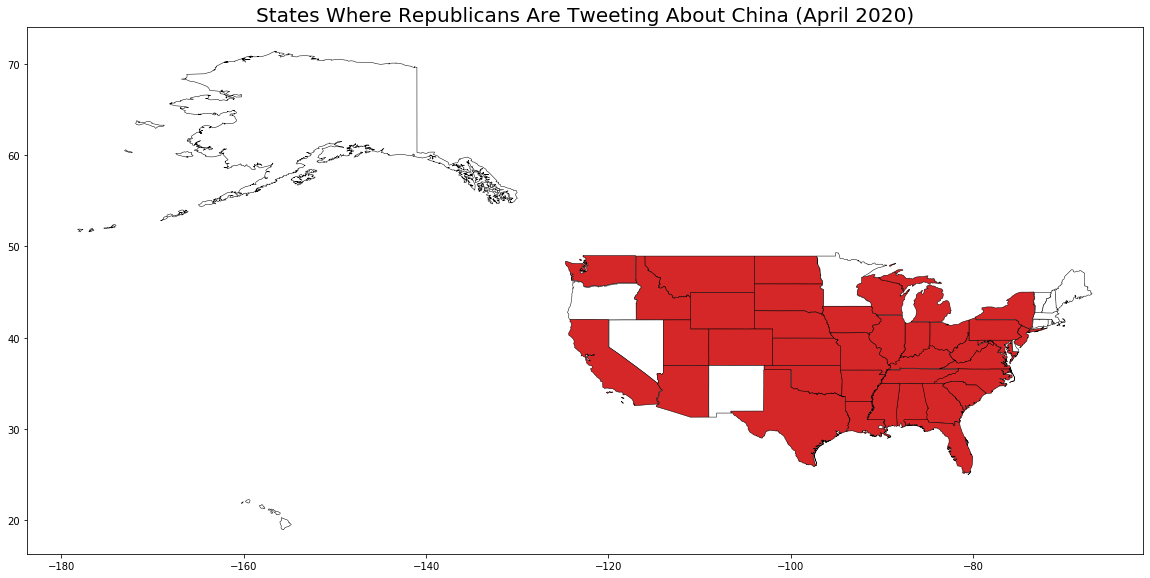

In [380]:
# usa.plot(figsize = (20, 20))
fig, ax = plt.subplots(figsize = (20,20))
ax.set_title("States Where Republicans Are Tweeting About China (April 2020)", fontsize = 20)

count = 0

for state in usa["STATE_ABBR"]:
    if state in states:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "tab:red", edgecolor = "black", linewidth = .5)
        count += 1
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        count += 1
        continue
       

In [363]:
frequency_list

[{'State': 'AL',
  'Week 4 Count': 2.0,
  'Week 3 Count': 2.0,
  'Week 2 Count': 1.0,
  'Week 1 Count': nan},
 {'State': 'AR',
  'Week 4 Count': 10.0,
  'Week 3 Count': 12.0,
  'Week 2 Count': 10.0,
  'Week 1 Count': 9.0},
 {'State': 'AZ',
  'Week 4 Count': 1.0,
  'Week 3 Count': 2.0,
  'Week 2 Count': nan,
  'Week 1 Count': nan},
 {'State': 'CA',
  'Week 4 Count': 1.0,
  'Week 3 Count': 2.0,
  'Week 2 Count': nan,
  'Week 1 Count': nan},
 {'State': 'CO',
  'Week 4 Count': 4.0,
  'Week 3 Count': 4.0,
  'Week 2 Count': 1.0,
  'Week 1 Count': 2.333333333333333},
 {'State': 'FL',
  'Week 4 Count': 21.0,
  'Week 3 Count': 9.0,
  'Week 2 Count': 2.0,
  'Week 1 Count': 4.0},
 {'State': 'GA',
  'Week 4 Count': 2.0,
  'Week 3 Count': 8.0,
  'Week 2 Count': 3.0,
  'Week 1 Count': 1.0},
 {'State': 'IA',
  'Week 4 Count': 3.0,
  'Week 3 Count': nan,
  'Week 2 Count': nan,
  'Week 1 Count': nan},
 {'State': 'ID',
  'Week 4 Count': nan,
  'Week 3 Count': 1.0,
  'Week 2 Count': nan,
  'Week 1 Count'

In [369]:
state_dict = frequency_list[0]
# state_dict["State"]

'AL'

In [406]:
type(state_dict["Week 4 Count"])

float

In [409]:
state_list = []
for dictionary in frequency_list:
    state = dictionary["State"]
    state_list.append(state)
    
len(state_list)

37

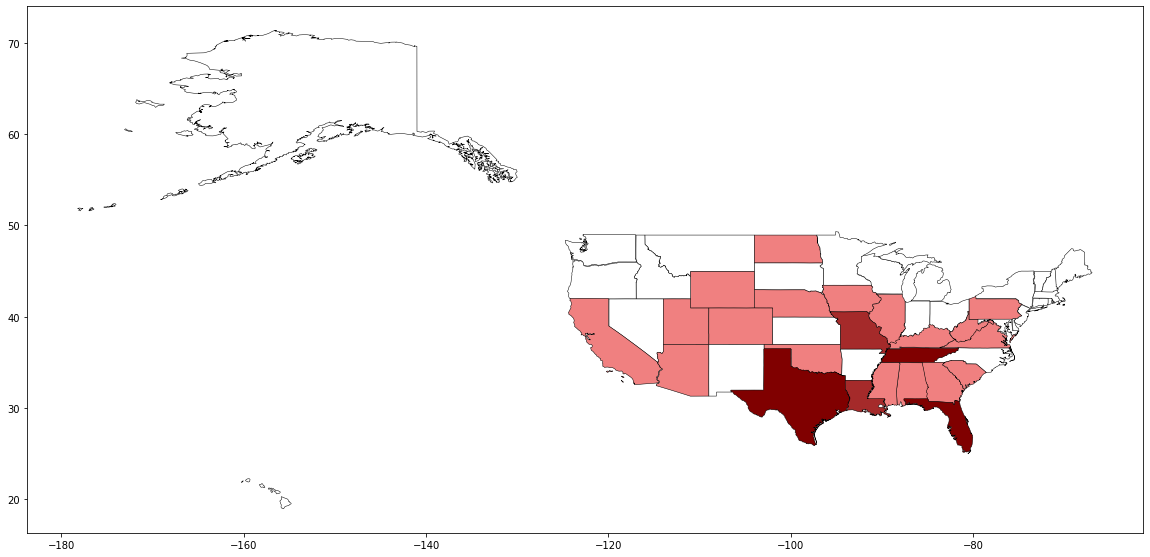

In [414]:
# usa.plot(figsize = (20, 20))
fig, ax = plt.subplots(figsize = (20,20))

state_list = []
for dictionary in frequency_list:
    state = dictionary["State"]
    state_list.append(state)
    
for state in usa["STATE_ABBR"]:
    if state in state_list:
        for dictionary in frequency_list:
            if dictionary["State"] == state:
                if dictionary["Week 4 Count"] < 5:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "lightcoral", edgecolor = "black", linewidth = .5)
                elif 5 < dictionary["Week 4 Count"] < 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "brown", edgecolor = "black", linewidth = .5)
                elif dictionary["Week 4 Count"] > 15:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "maroon", edgecolor = "black", linewidth = .5)
                else:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        continue

In [340]:
usa["STATE_ABBR"]

0     HI
1     WA
2     MT
3     ME
4     ND
5     SD
6     WY
7     WI
8     ID
9     VT
10    MN
11    OR
12    NH
13    IA
14    MA
15    NE
16    NY
17    PA
18    CT
19    RI
20    NJ
21    IN
22    NV
23    UT
24    CA
25    OH
26    IL
27    DC
28    DE
29    WV
30    MD
31    CO
32    KY
33    KS
34    VA
35    MO
36    AZ
37    OK
38    NC
39    TN
40    TX
41    NM
42    AL
43    MS
44    GA
45    SC
46    AR
47    LA
48    FL
49    MI
50    AK
Name: STATE_ABBR, dtype: object

In [ ]:
# compare republicans v democrats tweeting in the first two weeks of April v. last two weeks of April
# shade each state depending on how many tweets during that time period (lighter = fewer tweets)

### Tweets from First Half of April:

In [421]:
before_dict = {}
start_date = datetime.datetime(2020, 4, 1, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 15, 0, 0, 0)

for handle in gop_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >= 0 or tweet.find("Beijing") >= 0 or tweet.find("Wuhan") >= 0:
                tweets.append(tweet)
    before_dict[handle] = tweets
    
before_dict

{'@RepAbraham': [],
 '@Robert_Aderholt': ['RT @GOPLeader: Imagine what the world would look like if Communist China had not tried to cover up the coronavirus. It could have been cont…'],
 '@SenAlexander': [],
 '@RepRickAllen': [],
 '@justinamash': [],
 '@RepAmata': [],
 '@MarkAmodeiNV2': [],
 '@RepArmstrongND': [],
 '@RepArrington': ['RT @GOPoversight: The Chinese Communist Party has to be held accountable. https://t.co/5nCGcfM4vx',
  'I agree with my colleague in the Senate, @LindseyGrahamSC. \n\nChina must be held accountable for the deaths &amp; infect… https://t.co/PmbUY8GBSj',
  'RT @GOPoversight: 🚨NEW: Oversight Rs press WHO for info on its role in China\'s coronavirus propaganda campaign:\n\n"“Throughout the crisis, t…',
  'Right now, our focus has to be response &amp; relief, but as we recover, we must hold China &amp; the complicit @WHO accoun… https://t.co/tXTP6Vh5jC',
  'RT @RepJimBanks: Given the intelligence community‘s report today condemning the Chinese government’s hand

In [440]:
before_chinatweets_dict = {}
count = 0

for handle in gop_handle_list:
    for tweet in before_dict[handle]:
        before_chinatweets_dict[handle] = len(before_dict[handle])
    count += len(before_dict[handle])
    
before_chinatweets_dict

{'@Robert_Aderholt': 1,
 '@RepArrington': 5,
 '@RepBrianBabin': 2,
 '@RepAndyBarr': 1,
 '@RepJackBergman': 1,
 '@RepKevinBrady': 1,
 '@RepKenBuck': 4,
 '@RepTedBudd': 7,
 '@RepBuddyCarter': 1,
 '@RepCloudTX': 1,
 '@RepDougCollins': 4,
 '@SenTomCotton': 16,
 '@RepDanCrenshaw': 3,
 '@SteveDaines': 6,
 '@DesJarlaisTN04': 4,
 '@RepChuck': 1,
 '@RepBillFlores': 4,
 '@JeffFortenberry': 1,
 '@RepRussFulcher': 1,
 '@RepGallagher': 2,
 '@SenCoryGardner': 1,
 '@RepBobGibbs': 1,
 '@LindseyGrahamSC': 3,
 '@RepKayGranger': 1,
 '@RepMarkGreen': 1,
 '@RepGrothman': 1,
 '@RepAndyHarrisMD': 1,
 '@RepHartzler': 3,
 '@SenHawleyPress': 3,
 '@repkevinhern': 1,
 '@CongressmanHice': 5,
 '@RepTrey': 1,
 '@HurdOnTheHill': 4,
 '@RepBillJohnson': 1,
 '@Jim_Jordan': 3,
 '@RepTrentKelly': 1,
 '@SenJohnKennedy': 1,
 '@RepPeteKing': 2,
 '@RepDLamborn': 3,
 '@RepMcCaul': 1,
 '@cathymcmorris': 3,
 '@RepCarolMiller': 2,
 '@RepRalphNorman': 3,
 '@USRepGaryPalmer': 1,
 '@GReschenthaler': 7,
 '@RepTomRice': 1,
 '@SenPatRo

In [423]:
before = pd.DataFrame.from_dict(before_chinatweets_dict, orient = "index")
before = before.reset_index()
before = before.rename(columns = {"index":"Twitter Handle"})
before

,Twitter Handle,0
0,@Robert_Aderholt,1
1,@RepArrington,5
2,@RepBrianBabin,2
3,@RepAndyBarr,1
4,@RepJackBergman,1
5,@RepKevinBrady,1
6,@RepKenBuck,4
7,@RepTedBudd,7
8,@RepBuddyCarter,1
9,@RepCloudTX,1


In [441]:
count

151

In [445]:
len(before)

61

In [424]:
before_count_frame = gop_frame.copy()
before_count_frame = gop_frame.merge(before, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
before_count_frame.columns = ["State", "Twitter Handle", "Last Name", "First Name", "April 1-15 Count"]
before_count_frame

,State,Twitter Handle,Last Name,First Name,April 1-15 Count
0,AL,@Robert_Aderholt,Aderholt,Robert,1
1,TX,@RepArrington,Arrington,Jodey,5
2,TX,@RepBrianBabin,Babin,Brian,2
3,KY,@RepAndyBarr,Barr,Garland,1
4,MI,@RepJackBergman,Bergman,Jack,1
5,TX,@RepKevinBrady,Brady,Kevin,1
6,CO,@RepKenBuck,Buck,Ken,4
7,NC,@RepTedBudd,Budd,Ted,7
8,GA,@RepBuddyCarter,Carter,Buddy,1
9,TX,@RepCloudTX,Cloud,Michael,1


In [452]:
before_count_frame["April 1-15 Count"].max()

16

In [425]:
before_by_state = before_count_frame.groupby("State").sum()
before_by_state.to_csv("gop_before.csv")
before_by_state

,April 1-15 Count
State,
AL,2
AR,16
CO,10
FL,11
GA,10
ID,1
IN,1
KS,1
KY,1


In [426]:
gop_before = pd.read_csv("gop_before.csv")
before_states = []
for before_state in gop_before["State"]:
    before_states.append(before_state)
before_states

['AL',
 'AR',
 'CO',
 'FL',
 'GA',
 'ID',
 'IN',
 'KS',
 'KY',
 'LA',
 'MD',
 'MI',
 'MO',
 'MS',
 'MT',
 'NC',
 'NE',
 'NJ',
 'NY',
 'OH',
 'OK',
 'PA',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'WA',
 'WI',
 'WV']

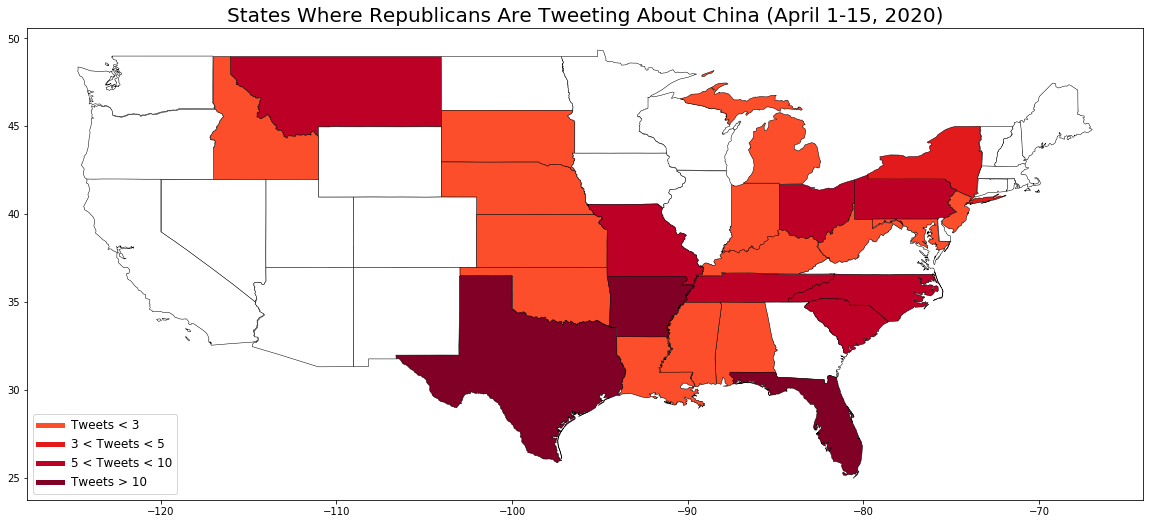

In [428]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_title("States Where Republicans Are Tweeting About China (April 1-15, 2020)", fontsize = 20)
ax.grid(False)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color = "#fc4e2a", lw = 5, label = "Tweets < 3"),
          Line2D([0], [0], color = "#e31a1c", lw = 5, label = "3 < Tweets < 5"),
          Line2D([0], [0], color = "#bd0026", lw = 5, label = "5 < Tweets < 10"),
          Line2D([0], [0], color = "#800026", lw = 5, label = "Tweets > 10")]
ax.legend(handles = legend_elements, loc = "lower left", fontsize = "large")


before_frequency_list = gop_before.to_dict(orient = "records")

state_list = []
for dictionary in before_frequency_list:
    state = dictionary["State"]
    state_list.append(state)
    
for state in usa["STATE_ABBR"]:
    if state == "AK" or state == "HI":
        continue
    if state in state_list:
        for dictionary in before_frequency_list:
            if dictionary["State"] == state:
                if dictionary["April 1-15 Count"] < 3:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#fc4e2a", edgecolor = "black", linewidth = .5)
                elif 3 < dictionary["April 1-15 Count"] < 5:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#e31a1c", edgecolor = "black", linewidth = .5)
                elif 5 < dictionary["April 1-15 Count"] < 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#bd0026", edgecolor = "black", linewidth = .5)
                elif dictionary["April 1-15 Count"] > 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#800026", edgecolor = "black", linewidth = .5)
                else:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        continue

### Tweets from Last Half of April:

In [429]:
after_dict = {}
start_date = datetime.datetime(2020, 4, 16, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 30, 0, 0, 0)

for handle in gop_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >= 0 or tweet.find("Beijing") >= 0 or tweet.find("Wuhan") >= 0:
                tweets.append(tweet)
    after_dict[handle] = tweets
    
after_dict

{'@RepAbraham': [],
 '@Robert_Aderholt': ['The Chinese Communist Party has been working for years to become a global pharmacy. And after blatantly lying and w… https://t.co/5uyqxSQpVN'],
 '@SenAlexander': [],
 '@RepRickAllen': [],
 '@justinamash': [],
 '@RepAmata': [],
 '@MarkAmodeiNV2': [],
 '@RepArmstrongND': ['RT @SteveScalise: Communist China lied to the world about Coronavirus and refused to let our experts in early to help stop the spread. Thei…',
  'RT @GOPLeader: Across the world, people have lost grandparents. Parents. Siblings. Children. All because China lied.\n\nNever again. Communis…',
  'RT @GOPLeader: 𝐍𝐞𝐯𝐞𝐫 𝐚𝐠𝐚𝐢𝐧. We can never again put ourselves in a position where we have to depend on Communist China for essential equipme…',
  'RT @RepKinzinger: When the Chinese gov’t tells me they “implemented control measures,” does that include the control of information; shutti…'],
 '@RepArrington': ['There is no telling the amount of human lives &amp; costs that would have been sa

In [442]:
after_chinatweets_dict = {}
count = 0

for handle in gop_handle_list:
    for tweet in after_dict[handle]:
        after_chinatweets_dict[handle] = len(after_dict[handle])
    count += len(after_dict[handle])
    
after_chinatweets_dict

{'@Robert_Aderholt': 1,
 '@RepArmstrongND': 4,
 '@RepArrington': 1,
 '@RepBrianBabin': 2,
 '@RepDonBacon': 4,
 '@RepJimBanks': 18,
 '@RepAndyBarr': 3,
 '@RepAndyBiggsAZ': 1,
 '@MarshaBlackburn': 28,
 '@SenatorBraun': 3,
 '@VernBuchanan': 2,
 '@RepKenBuck': 3,
 '@RepLarryBucshon': 1,
 '@RepTedBudd': 4,
 '@RepTimBurchett': 1,
 '@michaelcburgess': 2,
 '@KenCalvert': 2,
 '@RepBuddyCarter': 1,
 '@RepLizCheney': 1,
 '@RepCloudTX': 1,
 '@RepDougCollins': 2,
 '@JohnCornyn': 3,
 '@SenTomCotton': 24,
 '@RepRickCrawford': 5,
 '@RepDanCrenshaw': 3,
 '@SenTedCruz': 16,
 '@DesJarlaisTN04': 3,
 '@RepJeffDuncan': 1,
 '@SenJoniErnst': 3,
 '@RepChuck': 6,
 '@RepBillFlores': 1,
 '@virginiafoxx': 5,
 '@RepMattGaetz': 11,
 '@RepGallagher': 2,
 '@SenCoryGardner': 1,
 '@RepBobGibbs': 1,
 '@replouiegohmert': 1,
 '@RepAGonzalez': 1,
 '@RepGosar': 4,
 '@LindseyGrahamSC': 8,
 '@RepMarkGreen': 23,
 '@SenHawleyPress': 6,
 '@CongressmanHice': 4,
 '@RepFrenchHill': 1,
 '@RepRichHudson': 1,
 '@HurdOnTheHill': 9,
 '@R

In [443]:
count

364

In [446]:
after = pd.DataFrame.from_dict(after_chinatweets_dict, orient = "index")
after = after.reset_index()
after = after.rename(columns = {"index":"Twitter Handle"})
after

,Twitter Handle,0
0,@Robert_Aderholt,1
1,@RepArmstrongND,4
2,@RepArrington,1
3,@RepBrianBabin,2
4,@RepDonBacon,4
5,@RepJimBanks,18
6,@RepAndyBarr,3
7,@RepAndyBiggsAZ,1
8,@MarshaBlackburn,28
9,@SenatorBraun,3


In [447]:
len(after)

94

In [432]:
after_count_frame = gop_frame.copy()
after_count_frame = gop_frame.merge(after, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
after_count_frame.columns = ["State", "Twitter Handle", "Last Name", "First Name", "April 16-30 Count"]
after_count_frame

,State,Twitter Handle,Last Name,First Name,April 16-30 Count
0,AL,@Robert_Aderholt,Aderholt,Robert,1
1,ND,@RepArmstrongND,Armstrong,Kelly,4
2,TX,@RepArrington,Arrington,Jodey,1
3,TX,@RepBrianBabin,Babin,Brian,2
4,NE,@RepDonBacon,Bacon,Don,4
5,IN,@RepJimBanks,Banks,Jim,18
6,KY,@RepAndyBarr,Barr,Garland,3
7,AZ,@RepAndyBiggsAZ,Biggs,Andy,1
8,TN,@MarshaBlackburn,Blackburn,Marsha,28
9,IN,@SenatorBraun,Braun,Mike,3


In [451]:
after_count_frame["April 16-30 Count"].max()

28

In [456]:
after_by_state = after_count_frame.groupby("State").sum()
after_by_state.to_csv("gop_after.csv")
after_by_state = after_by_state.sort_values("April 16-30 Count")
after_by_state

,April 16-30 Count
State,
AK,1
OK,1
WV,1
MN,1
WY,1
MS,2
WI,2
SD,2
IA,3


In [434]:
gop_after = pd.read_csv("gop_after.csv")
after_states = []
for after_state in gop_after["State"]:
    after_states.append(after_state)
after_states

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'FL',
 'GA',
 'IA',
 'IL',
 'IN',
 'KY',
 'LA',
 'MN',
 'MO',
 'MS',
 'NC',
 'ND',
 'NE',
 'OH',
 'OK',
 'PA',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'WI',
 'WV',
 'WY']

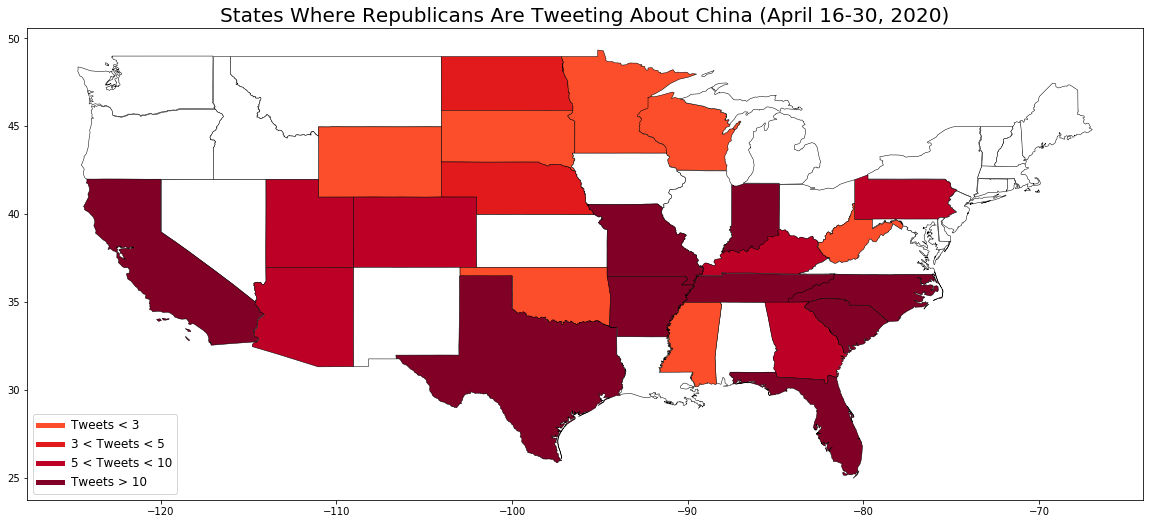

In [437]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_title("States Where Republicans Are Tweeting About China (April 16-30, 2020)", fontsize = 20)
ax.grid(False)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color = "#fc4e2a", lw = 5, label = "Tweets < 3"),
          Line2D([0], [0], color = "#e31a1c", lw = 5, label = "3 < Tweets < 5"),
          Line2D([0], [0], color = "#bd0026", lw = 5, label = "5 < Tweets < 10"),
          Line2D([0], [0], color = "#800026", lw = 5, label = "Tweets > 10")]
ax.legend(handles = legend_elements, loc = "lower left", fontsize = "large")


after_frequency_list = gop_after.to_dict(orient = "records")

state_list = []
for dictionary in after_frequency_list:
    state = dictionary["State"]
    state_list.append(state)
    
for state in usa["STATE_ABBR"]:
    if state == "AK" or state == "HI":
        continue
    if state in state_list:
        for dictionary in after_frequency_list:
            if dictionary["State"] == state:
                if dictionary["April 16-30 Count"] < 3:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#fc4e2a", edgecolor = "black", linewidth = .5)
                elif 3 < dictionary["April 16-30 Count"] < 5:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#e31a1c", edgecolor = "black", linewidth = .5)
                elif 5 < dictionary["April 16-30 Count"] < 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#bd0026", edgecolor = "black", linewidth = .5)
                elif dictionary["April 16-30 Count"] > 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#800026", edgecolor = "black", linewidth = .5)
                else:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        continue